## **16. 특징 추출 및 변환**

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# 데이터 읽어오기

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

/var/folders/48/489v9bgn2lj1pfnl7jxr7y300000gn/T/ipykernel_1102/1189875795.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(input_file,


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [ ]:
#  # 시각화 설정 옵션
# %matplotlib qt5
# %config InlineBackend.figure_format = 'svg'

# plt.rcParams['figure.figsize'] = [12, 5]
# plt.rcParams['font.size'] = 13
# plt.ion()

In [14]:
# [+] 일산화탄소 변수 결측 데이터 처리
co = df['CO(GT)'].copy()  # 복사본 생성
co.interpolate(inplace = True)# 선형 보간

### **구간화**(binning)

In [18]:
# [+] 최대값, 최소값
max_val = co.max()
min_val = co.min()

print(max_val, min_val)

11.9 0.0


In [20]:
# [+] 구간 별 기준 값 집합 생성
bins = np.linspace(min_val, max_val, 6)
bins

array([ 0.  ,  2.38,  4.76,  7.14,  9.52, 11.9 ])

In [22]:
# 구간에 대한 레이블 집합
labels=['0<=x<2.38', '2.38<=x<4.76', '4.76<=x<7.14',
       '7.14<=x<9.52', '9.52<=x<11.9']

In [24]:
# 일산화탄소 변수(수치형)에 대한 범주형 변수 생성
df['bins'] = pd.cut(
    co, 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CO(GT)         7765 non-null   float64 
 1   PT08.S1(CO)    8991 non-null   float64 
 2   PT08.S2(NMHC)  8991 non-null   float64 
 3   NOx(GT)        7718 non-null   float64 
 4   PT08.S3(NOx)   8991 non-null   float64 
 5   NO2(GT)        7715 non-null   float64 
 6   PT08.S4(NO2)   8991 non-null   float64 
 7   PT08.S5(O3)    8991 non-null   float64 
 8   RH             8991 non-null   float64 
 9   AH             8991 non-null   float64 
 10  C6H6(GT)       9357 non-null   float64 
 11  bins           9357 non-null   category
dtypes: category(1), float64(11)
memory usage: 886.6 KB


In [26]:
# bins 변수 출력
df['bins']

Datetime
2004-03-10 18:00:00    2.38<=x<4.76
2004-03-10 19:00:00       0<=x<2.38
2004-03-10 20:00:00       0<=x<2.38
2004-03-10 21:00:00       0<=x<2.38
2004-03-10 22:00:00       0<=x<2.38
                           ...     
2005-04-04 10:00:00    2.38<=x<4.76
2005-04-04 11:00:00    2.38<=x<4.76
2005-04-04 12:00:00    2.38<=x<4.76
2005-04-04 13:00:00       0<=x<2.38
2005-04-04 14:00:00       0<=x<2.38
Name: bins, Length: 9357, dtype: category
Categories (5, object): ['0<=x<2.38' < '2.38<=x<4.76' < '4.76<=x<7.14' < '7.14<=x<9.52' < '9.52<=x<11.9']

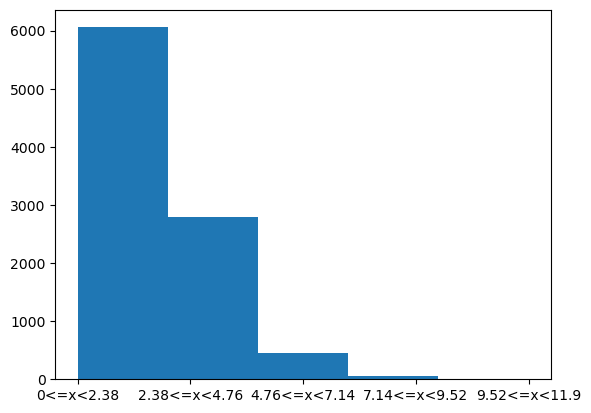

In [28]:
# bins 변수의 히스토그램 시각화
plt.hist(sorted(df['bins']), bins=len(bins)-1)
plt.show()

### **로그 변환**(log transformation)

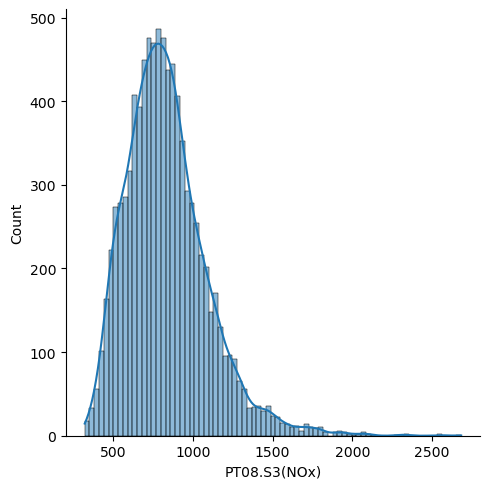

In [34]:
# 질소 산화물 분포 시각화
sns.displot(df['PT08.S3(NOx)'], kde=True)

In [ ]:
# [+] 로그 스케일로 변환: Common logarithm(log10)
df['log'] = ...

In [ ]:
# 변환된 변수 출력
df['log']

In [ ]:
# 변환된 변수의 분포 시각화
sns.displot(df['log'], kde=True)
plt.xlabel('log(NOx)')
plt.show()

### **원핫인코딩**(one-hot encoding)

In [ ]:
# 예제 데이터: 인사 평가

emp_id = pd.Series([1, 2, 3, 4, 5])
gender = pd.Series(['Male', 'Female', 'Female', 'Male', 'Female'])
remarks = pd.Series(['Nice', 'Good', 'Great', 'Great', 'Nice'])

df_emp = pd.DataFrame()
df_emp['emp_id'] = emp_id
df_emp['gender'] = gender
df_emp['remarks'] = remarks

df_emp

In [ ]:
# [+] 범주형 변수 별(gender, remarks) Unique value 리스트 출력
print(...)
print(...)

In [ ]:
# [+] 원핫인코딩 적용: 범주형 변수 -> 이진값 벡터
df_emp_encoded = ...
df_emp_encoded

### **정규화**(normalization)

In [ ]:
# [+] 비메탄탄화수소 변수 결측 데이터 처리
nmhc = ... # 복사본 생성
... # 결측치 처리

In [ ]:
# 스케일이 서로 다른 두 변수 시각화
plt.plot(co, label='Carbon monooxide')
plt.plot(nmhc, label='Non-methane hydrocarbon')
plt.ylabel('Concentration')
plt.legend(loc='best')

In [ ]:
# [+] 일산화탄소 변수 정규화
co_max = ...  # 최대값
co_min = ...  # 최소값

# 최소-최대 정규화
df['CO_Norm'] = ...
df['CO_Norm']

In [ ]:
# [+] 비메탄탄화수소 변수 정규화
nmhc_max = ...
nmhc_min = ...

df['NMHC_Norm'] = ...
df['NMHC_Norm']

In [ ]:
# 정규화된 두 변수 시각화
plt.plot(df['CO_Norm'], label='Carbon monooxide')
plt.plot(df['NMHC_Norm'], label='Non-methane hydrocarbon')
plt.ylabel('Concentration')
plt.legend(loc='best')

### **특징 분할**

In [ ]:
# 예제: 영화 데이터
movies = pd.Series(["The Godfather, 1972, Francis Ford Coppola",
                    "Contact, 1997, Robert Zemeckis",
                   "Parasite, 2019, Joon-ho Bong"])

movies

In [ ]:
# 영화 데이터의 값 부
# Divide movie data into title, year, director columns
lst_title = []
lst_year = []
lst_director = []

for val in movies:
    title, year, director = val.split(',')  # data split
    lst_title.append(title)
    lst_year.append(year)
    lst_director.append(director)

print(lst_title)
print(lst_year)
print(lst_director)

In [ ]:
# Make a DataFrame object
df_movie = pd.DataFrame()
df_movie['title'] = lst_title
df_movie['year'] = lst_year
df_movie['director'] = lst_director

df_movie